In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

In [6]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

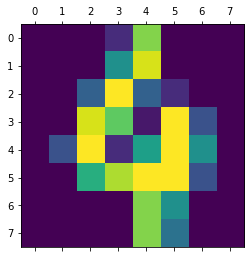

In [20]:
plt.matshow(digits.images[100])

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [34]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.1, random_state = 42)

In [53]:
logreg = LogisticRegression(solver='newton-cg', max_iter=1000)

In [54]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [55]:
y_pred = logreg.predict(X_test)

In [56]:
logreg.score(X_test, y_test)

0.9777777777777777

Text(33.0, 0.5, 'True')

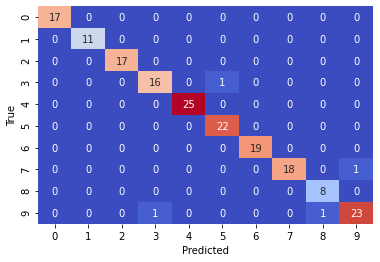

In [63]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', cbar=None)
plt.xlabel('Predicted')
plt.ylabel('True')

#### Exercise

In [102]:
from sklearn.datasets import load_iris

In [103]:
iris = load_iris()

In [104]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [129]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [130]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [131]:
df['target'] = pd.Series(iris.target)

In [132]:
df['target_names'] = pd.Series(iris.target_names)

In [133]:
df['target_names'] = df['target_names'].astype('string')

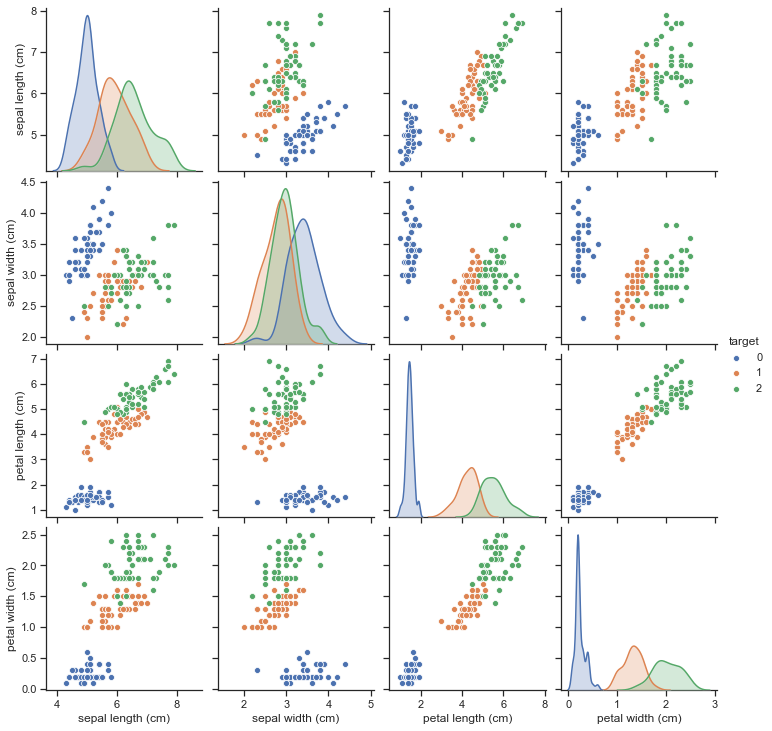

In [134]:
sns.pairplot(df, hue='target')

In [135]:
logreg = LogisticRegression(solver='newton-cg', max_iter=1000)

In [136]:
X = df.drop(columns=['target','target_names'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [137]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [140]:
y_pred = pd.Series(logreg.predict(X_test))

In [142]:
metrics.balanced_accuracy_score(y_test, y_pred)

1.0

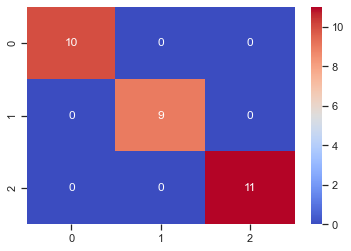

In [145]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')